In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100
import extractmm as exmm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
singlefamily = pd.merge(exmm.extractmissingmiddle('011818','singlefamily'),
                    exmm.extractmissingmiddle('2001','singlefamily'),left_index=True,right_index=True)

two2four = pd.merge(exmm.extractmissingmiddle('011818','two2four'),
                    exmm.extractmissingmiddle('2001','two2four'),left_index=True,right_index=True)
townhouse = pd.merge(exmm.extractmissingmiddle('011818','townhouse'),
                    exmm.extractmissingmiddle('2001','townhouse'),left_index=True,right_index=True)
condo = pd.merge(exmm.extractmissingmiddle('011818','condo'),
                    exmm.extractmissingmiddle('2001','condo'),left_index=True,right_index=True)
multidwg = pd.merge(exmm.extractmissingmiddle('011818','multidwg'),
                    exmm.extractmissingmiddle('2001','multidwg'),left_index=True,right_index=True)
aprtmt = pd.merge(exmm.extractmissingmiddle('011818','aprtmt'),
                    exmm.extractmissingmiddle('2001','aprtmt'),left_index=True,right_index=True)
vacant = pd.merge(exmm.extractmissingmiddle('011818','vacant'),
                    exmm.extractmissingmiddle('2001','vacant'),left_index=True,right_index=True)

housecount = pd.merge(pd.merge(singlefamily,two2four,left_index=True,right_index=True),
                      pd.merge(townhouse,condo,left_index=True,right_index=True),
                      left_index=True,right_index=True)
housecount = pd.merge(pd.merge(housecount,multidwg,left_index=True,right_index=True),
                      pd.merge(aprtmt,vacant,left_index=True,right_index=True),
                      left_index=True,right_index=True)
housecount.to_csv('missingmiddle.csv',index=False)
housecount

,singlefamily_2018,singlefamily_2000,two2four_2018,two2four_2000,townhouse_2018,townhouse_2000,condo_2018,condo_2000,multidwg_2018,multidwg_2000,aprtmt_2018,aprtmt_2000,vacant_2018,vacant_2000
0,70573,52606,1996,2192,8964,3870,2732,58,224,20,745,730,14433,13729


In [3]:
houseprcchng = pd.DataFrame()
houseprcchng['singlefamily0018'] = 100.0-((housecount.singlefamily_2000/housecount.singlefamily_2018)*100)
houseprcchng['two2four0018'] = 100.0-((housecount.two2four_2000/housecount.two2four_2018)*100)
houseprcchng['townhouse0018'] = 100.0-((housecount.townhouse_2000/housecount.townhouse_2018)*100)
houseprcchng['condo0018'] = 100.0-((housecount.condo_2000/housecount.condo_2018)*100)
houseprcchng['multidwg0018'] = 100.0-((housecount.multidwg_2000/housecount.multidwg_2018)*100)
houseprcchng['aprtmt0018'] = 100.0-((housecount.aprtmt_2000/housecount.aprtmt_2018)*100)
houseprcchng['vacant0018'] = 100.0-((housecount.vacant_2000/housecount.vacant_2018)*100)
houseprcchng

,singlefamily0018,two2four0018,townhouse0018,condo0018,multidwg0018,aprtmt0018,vacant0018
0,25.458745,-9.819639,56.827309,97.877013,91.071429,2.013423,4.877711


<Figure size 432x288 with 0 Axes>

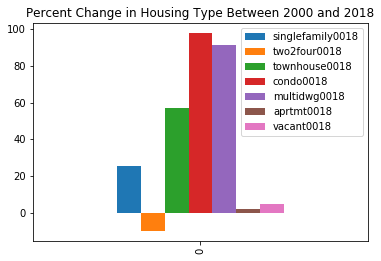

In [4]:
plt.figure();
houseprcchng.plot(kind='bar',title='Percent Change in Housing Type Between 2000 and 2018');
plt.savefig('houseprcchng.png')

In [5]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [6]:
houseprcchng.style.applymap(color_negative_red)

,singlefamily0018,two2four0018,townhouse0018,condo0018,multidwg0018,aprtmt0018,vacant0018
0,25.4587,-9.81964,56.8273,97.877,91.0714,2.01342,4.87771


In [7]:
housecount.index.name = 'Dwelling Type'

In [8]:
housecount.rename(index={0: 'Number'}).transpose()

Dwelling Type,Number
singlefamily_2018,70573
singlefamily_2000,52606
two2four_2018,1996
two2four_2000,2192
townhouse_2018,8964
townhouse_2000,3870
condo_2018,2732
condo_2000,58
multidwg_2018,224
multidwg_2000,20
